# Average Coders

### Analyze and Visualize

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')


In [4]:
# Read the National Dataframe that was produced in the earlier Jupyter Notebook
national_df_filename = "national_dataframe.csv"
national_df = pd.read_csv (national_df_filename)
print(f'The number of rows of data for the clean National dataframe is now {len(national_df.index)}')
national_df.head()

The number of rows of data for the clean National dataframe is now 348


,date,st_interest,it_interest,lt_interest,cpi_index,pct_chg_cpi,oil_price,pct_chg_oil_price,mtg_purchase,mtg_refi,pct_chg_mtg_purchase,pct_cht_mtg_refi,employment,pct_chg_employment,avg_earnings,pct_chg_avg_earnings
0,1990-01-01,7.90,8.09,8.21,127.5,5.20,22.86,26.86,31.0,7.0,NaN,NaN,109197,1.90,10.02,3.83
1,1990-02-01,8.00,8.37,8.47,128.0,5.26,22.11,23.24,31.0,7.0,NaN,NaN,109435,1.87,10.07,4.03
2,1990-03-01,8.17,8.63,8.59,128.6,5.24,20.39,4.67,31.0,7.0,NaN,NaN,109644,1.88,10.11,4.23
3,1990-04-01,8.04,8.72,8.79,128.9,4.71,18.43,-12.53,36.0,5.0,NaN,NaN,109688,1.76,10.12,3.79
4,1990-05-01,8.01,8.64,8.76,129.1,4.37,18.20,-9.54,36.0,5.0,NaN,NaN,109839,1.78,10.16,4.31


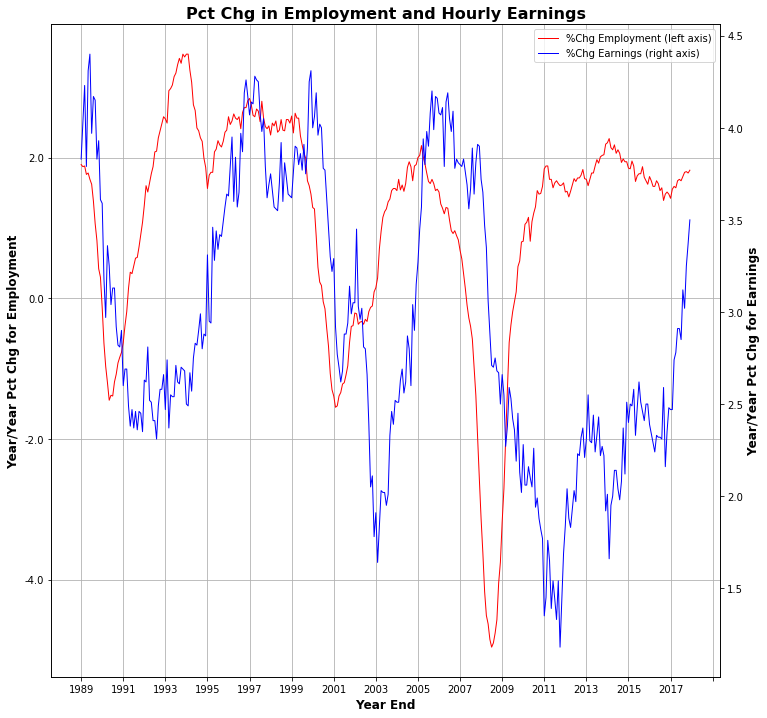

In [6]:
# Graph the percent change in employment and percent change in hourly earnings

# Set the size of the graph
fig, ax1 = plt.subplots(figsize=(12,12))
ax2 = ax1.twinx()

# Give it a title, and labels for the axes
ax1.set_title("Pct Chg in Employment and Hourly Earnings", size=16, weight="bold")
ax1.set_xlabel("Year End", size=12, weight="bold")
ax1.set_ylabel("Year/Year Pct Chg for Employment", size=12, weight="bold")
ax2.set_ylabel("Year/Year Pct Chg for Earnings", size=12, weight="bold")

# Create a list of marker types.  I couldn't figure out how to have "plt" show a default marker
# so I created this list of 15 marker types.  It's in the code if needed.
marker_type = ['o','v','^','<','>','s','p','*','h','H','1','2','3','4','+']

# Draw the lines
line1 = ax1.plot(national_df["date"], national_df["pct_chg_employment"], color="Red", linewidth=1, label='%Chg Employment (left axis)')
line2 = ax2.plot(national_df["date"], national_df["pct_chg_avg_earnings"], color="Blue", linewidth=1, label='%Chg Earnings (right axis)')

# Set the formatting for the Y-axes
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.1f}'))
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.1f}'))

# Create the legend in ax1 for all lines in the figure
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc="best")

# Set the tick marks on the x-axis, every 2 years, show only the year
plt.xticks(np.arange(0, len(national_df["date"])+24, 24))

first_tick_label = int(national_df["date"][0][:4]) -1
last_tick_label_plus1 = int(national_df["date"].iloc[-1][:4]) + 1
myticklabels=np.arange(first_tick_label,last_tick_label_plus1,2)
ax1.set_xticklabels(myticklabels, horizontalalignment="center")

# Add a grid, based off the left-side y-axis
ax1.grid()

# Save the Figure
plt.savefig ('Output/graph1.png')

# Show the Figure
plt.show()